In [3]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


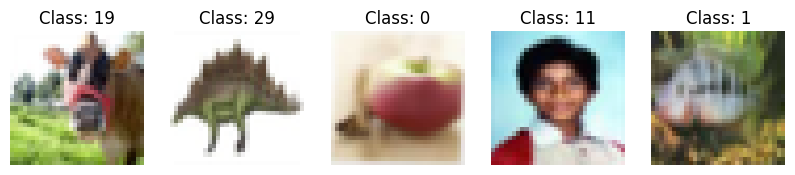

In [4]:
# Your code here
# Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes.
print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)
print("Image dimensions:", x_train.shape[1:])
print("Number of classes:", len(set(y_train.flatten())))

# Show a few examples from the training set.
import matplotlib.pyplot as plt

# Define the number of images to display
num_images = 5

# Plot the images
plt.figure(figsize=(10, 2))
for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(x_train[i])
    plt.title(f"Class: {y_train[i][0]}")
    plt.axis('off')
plt.show()

In [5]:
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Step 1: Normalize the Images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 2: One-Hot Encode the Labels
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Step 3: Split the Training Set into Training and Validation Sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Add convolutional layers, max pooling layers, and dense layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(units=100, activation='softmax'))  # Output layer with 100 units (one for each class)

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(x_val, y_val)
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 52ms/step - accuracy: 0.0318 - loss: 4.3919 - val_accuracy: 0.1383 - val_loss: 3.6617
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 47ms/step - accuracy: 0.1322 - loss: 3.6710 - val_accuracy: 0.2050 - val_loss: 3.2893
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 61s 49ms/step - accuracy: 0.1863 - loss: 3.3646 - val_accuracy: 0.2449 - val_loss: 3.0725
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.2229 - loss: 3.1633 - val_accuracy: 0.2793 - val_loss: 2.9076
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.2507 - loss: 3.0156 - val_accuracy: 0.2985 - val_loss: 2.8193
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 82s 49ms/step - accuracy: 0.2784 - loss: 2.8758 - val_accuracy: 0.3119 - val_loss: 2.7561
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.2986 - loss: 2.7865 - val_accuracy: 0.3147 - val_loss: 2.7137
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 59s 47ms/step - accuracy: 0.3119 -

In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f'Test Loss:     {test_loss:.4f}')
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss:     2.6005
Test Accuracy: 0.3480


In [10]:
from sklearn.metrics import f1_score

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Calculate F1-Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"F1-Score: {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step
F1-Score: 0.3412


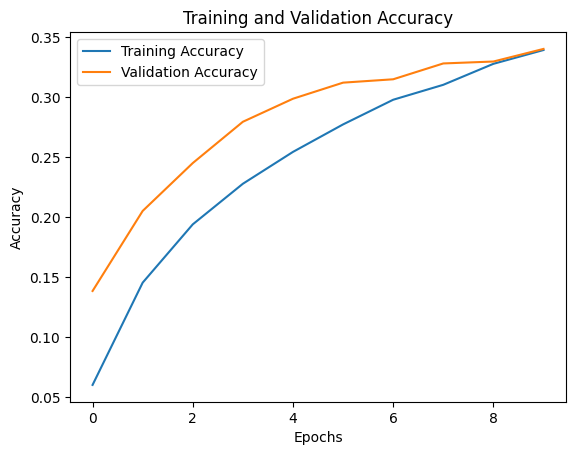

In [11]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


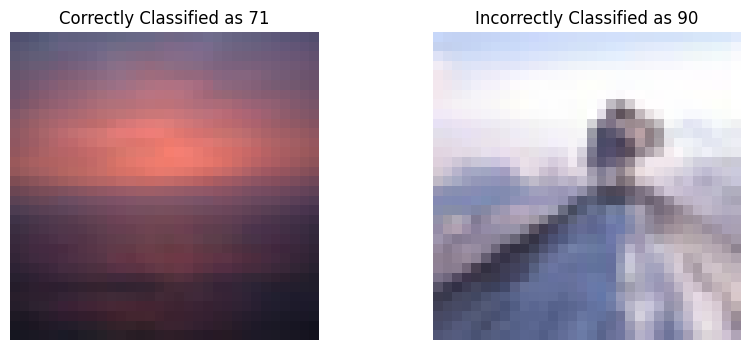

Classification Probabilities for Correctly Classified Image: [3.0823623e-05 7.5251306e-04 1.7420297e-07 3.4185066e-06 2.4903247e-06
 5.4313226e-05 4.1871268e-12 4.4356027e-10 2.0739082e-09 6.1130354e-06
 6.6372100e-04 6.8077178e-08 1.2498350e-04 4.8526414e-07 2.1821009e-10
 2.9491634e-06 2.5112213e-06 3.7772827e-06 1.3329666e-05 4.0849836e-06
 9.0682491e-08 2.0987632e-09 5.5346359e-06 5.6446873e-02 2.0852207e-09
 3.6247598e-03 1.9275149e-06 7.0383289e-06 7.6525219e-05 2.7378791e-08
 2.7238027e-06 2.3506942e-07 1.7734573e-04 3.1538174e-04 1.6165669e-07
 1.1856899e-08 6.4102869e-06 2.5801876e-06 8.1370359e-09 1.0199008e-04
 1.4145183e-04 2.6680402e-09 3.0384214e-08 1.7249275e-09 7.6763681e-06
 2.9241554e-07 8.4732307e-08 2.8105242e-05 4.9014297e-13 2.6147824e-02
 1.0702178e-06 4.2260832e-05 1.3882136e-06 1.8663219e-06 2.7308238e-07
 9.1255160e-06 1.2699880e-06 9.8413229e-06 2.4191291e-07 3.6900826e-07
 2.1359868e-01 2.2651118e-05 1.7552480e-06 8.4066016e-08 2.8589042e-08
 2.9187813e-05 3

In [12]:
import numpy as np

# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Find correct and incorrect classifications
correct_indices = np.nonzero(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect classification
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correct classification
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified as {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrect classification
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified as {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Report the classification probabilities for each
correct_probabilities = y_pred[correct_idx]
incorrect_probabilities = y_pred[incorrect_idx]

print(f"Classification Probabilities for Correctly Classified Image: {correct_probabilities}")
print(f"Classification Probabilities for Incorrectly Classified Image: {incorrect_probabilities}")


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of the ImageDataGenerator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Define the number of epochs and batch size
epochs = 10
batch_size = 32

# Train the model using the data generator
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val)
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 71ms/step - accuracy: 0.2179 - loss: 3.2386 - val_accuracy: 0.3262 - val_loss: 2.6533
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 71ms/step - accuracy: 0.2260 - loss: 3.1576 - val_accuracy: 0.3165 - val_loss: 2.6956
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 70ms/step - accuracy: 0.2343 - loss: 3.1267 - val_accuracy: 0.3137 - val_loss: 2.6994
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 69ms/step - accuracy: 0.2445 - loss: 3.0808 - val_accuracy: 0.3196 - val_loss: 2.6562
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - accuracy: 0.2503 - loss: 3.0565 - val_accuracy: 0.3352 - val_loss: 2.5749
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 70ms/step - accuracy: 0.2546 - loss: 3.0326 - val_accuracy: 0.3103 - val_loss: 2.6775
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 69ms/step - accuracy: 0.2498 - loss: 3.0294 - val_accuracy: 0.3224 - val_loss: 2.6091
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 145s 72ms/step - accuracy: 0.2557 - loss: 3.

In [14]:
# Re-train the model using data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=10,
    validation_data=(x_val, y_val)
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

print(f"Enhanced Model Test Accuracy: {test_accuracy:.4f}")

# Calculate the F1-Score
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

from sklearn.metrics import f1_score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print(f"Enhanced Model F1-Score: {f1:.4f}")

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 88s 70ms/step - accuracy: 0.2622 - loss: 2.9520 - val_accuracy: 0.3347 - val_loss: 2.5736
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 141s 69ms/step - accuracy: 0.2719 - loss: 2.9321 - val_accuracy: 0.3421 - val_loss: 2.5409
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 93s 74ms/step - accuracy: 0.2687 - loss: 2.9414 - val_accuracy: 0.3393 - val_loss: 2.5619
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 71ms/step - accuracy: 0.2720 - loss: 2.9116 - val_accuracy: 0.3462 - val_loss: 2.5335
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 91s 73ms/step - accuracy: 0.2773 - loss: 2.9055 - val_accuracy: 0.3335 - val_loss: 2.5987
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 72ms/step - accuracy: 0.2813 - loss: 2.8891 - val_accuracy: 0.3340 - val_loss: 2.6038
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 90s 71ms/step - accuracy: 0.2806 - loss: 2.8961 - val_accuracy: 0.3451 - val_loss: 2.5570
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 146s 75ms/step - accuracy: 0.282

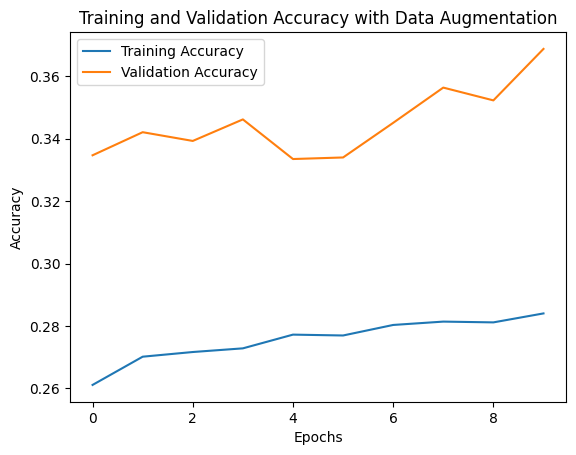

In [15]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

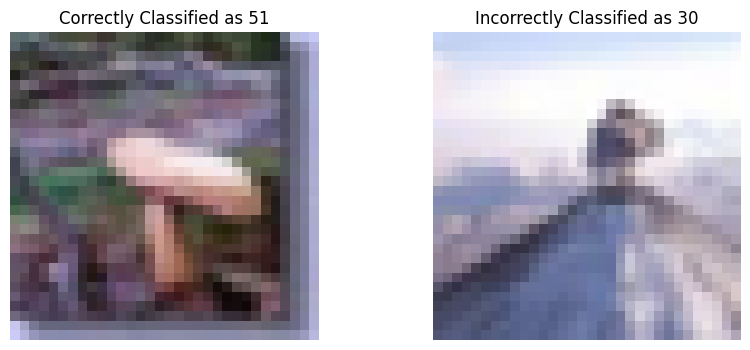

Classification Probabilities for Correctly Classified Image: [5.32424485e-04 3.24117159e-03 4.12179576e-03 9.31353495e-03
 1.34830149e-02 5.19891037e-03 2.53046118e-03 1.10449013e-03
 8.71127006e-04 1.11797964e-03 1.06541216e-02 9.80389118e-03
 1.22713391e-02 3.77315916e-02 2.94563733e-03 7.13974331e-03
 2.69748690e-03 1.20890501e-03 7.30951084e-03 9.98846535e-03
 1.77349860e-03 1.41537404e-02 3.71563341e-03 1.85504253e-03
 1.16167322e-03 7.68416142e-03 2.24181935e-02 2.80260649e-02
 2.92241597e-03 1.19006597e-02 1.59938529e-03 3.60908243e-03
 2.24664081e-02 2.25701486e-03 4.12147725e-03 1.16769671e-02
 2.12318395e-04 3.73613313e-02 6.68432051e-03 1.59793235e-02
 3.05544399e-02 1.06705388e-03 3.31457821e-03 1.23199099e-03
 1.12778125e-02 1.29216192e-02 2.08682083e-02 3.84108629e-04
 2.85561127e-03 6.74827257e-04 2.34147836e-03 1.91572666e-01
 2.35170082e-04 2.46263462e-05 5.34062181e-03 2.86842603e-02
 3.27539863e-03 1.63990445e-03 2.49970760e-02 1.44573464e-03
 3.39218313e-05 1.072453

In [17]:
import numpy as np

# Visualize Correctly and Incorrectly Classified Images

# Find correct and incorrect classifications
correct_indices = np.nonzero(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect classification
correct_idx = correct_indices[0]
incorrect_idx = incorrect_indices[0]

# Plot the correct classification
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_idx])
plt.title(f"Correctly Classified as {y_pred_classes[correct_idx]}")
plt.axis('off')

# Plot the incorrect classification
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_idx])
plt.title(f"Incorrectly Classified as {y_pred_classes[incorrect_idx]}")
plt.axis('off')

plt.show()

# Report the classification probabilities for each
correct_probabilities = y_pred[correct_idx]
incorrect_probabilities = y_pred[incorrect_idx]

print(f"Classification Probabilities for Correctly Classified Image: {correct_probabilities}")
print(f"Classification Probabilities for Incorrectly Classified Image: {incorrect_probabilities}")